In [ ]:
library(data.table)
library(clusterProfiler)
library(dplyr)
library(org.Hs.eg.db)
library(ggplot2)
library(dplyr)
library(stringr)
library(ggstance)
library(forcats)

In [ ]:
library(scales)
library("viridis") # Load

In [3]:
library(enrichplot)

In [ ]:
library(corrplot)

In [ ]:
library(ComplexHeatmap)
library(survminer)
library(ggplot2)
library(survival)
library(readxl)

In [ ]:
library(ggpubr)
library(ggrepel)
library(tidyr)
library(tibble)
library(DT)
library(DESeq2)
library(apeglm)
library("FactoMineR")
library("factoextra")

In [8]:
library(stringr)

In [39]:
load('../02.differential/Deseq2_TvsN_FC2.Rdata')

In [40]:
load('../02.differential/TumoronlyDEseq2.FC1.5.Rdata')

### 7. DO GSEA for tumor only

In [42]:
hallmark <-read.gmt("/disk1/pengweixing/esophageal/12.RNAseq/06.GSEA_T_vs_N/h.all.v2023.1.Hs.symbols.gmt")

In [21]:
#hallmark %>% filter(term=="HALLMARK_DNA_REPAIR") %>% 
#    write.table(x = .,file = "/disk1/pengweixing/esophageal/14.WES/05.cnv_merge/chr15/dna.repair.txt",
#                sep="\t",quote = F,row.names=F)

In [22]:
#write.table(x=filter(hallmark,term=="HALLMARK_INFLAMMATORY_RESPONSE"),file="inflammation.gene.txt",sep="\t",
#            quote = F,row.names=F)

In [23]:
#senescence <- read.table('senescence.txt',header=F)
#senescence$term <- "Senescence"
#colnames(senescence) <- c("gene","term")
#senescence <- senescence[,c(2,1)]

In [24]:
#rbind(hallmark,senescence) -> hallmark

In [43]:
do_gsea2 <- function(rlt){
    
    genes <- sign(rlt$all$log2FoldChange)*-log10(rlt$all$padj)
  #  genes <- rlt$all$log2FoldChange*-log10(rlt$all$padj)
    nan_na_index <- which(!is.na(rlt$all$padj))
    rlt$all <- rlt$all[nan_na_index,]
    genes <- sign(rlt$all$log2FoldChange)*-log10(rlt$all$padj)
    
    names(genes) <- rownames(rlt$all)
    genes <- sort(genes,decreasing = T)
    gsea<-GSEA(genes,TERM2GENE = hallmark,pvalueCutoff = 1) 
    y_high <- arrange(as.data.frame(gsea), abs(NES)) %>% filter(p.adjust<=0.05) %>% 
     group_by(sign(NES))
    y_high$Description %>% str_replace('HALLMARK_','')%>% str_to_title() -> y_high$Description
    p <- ggplot(y_high, aes(NES, fct_reorder(Description, NES), fill=p.adjust), showCategory=10) + 
     geom_barh(stat='identity') + 
     scale_fill_continuous(low='red', high='blue') + 
     theme_minimal() + ylab(NULL)+theme(axis.text  = element_text(color="black"))
     return(list(gsea = gsea,plot = p))
}

In [45]:
rlt_high_t$all$log2FoldChange <- -rlt_high_t$all$log2FoldChange 
rlt_low_t$all$log2FoldChange <- -rlt_low_t$all$log2FoldChange 
rlt_neg_t$all$log2FoldChange <- -rlt_neg_t$all$log2FoldChange 

In [ ]:
gsea_high_t <- do_gsea2(rlt_high_t)
gsea_low_t <- do_gsea2(rlt_low_t)
gsea_neg_t <- do_gsea2(rlt_neg_t)

In [53]:
save(gsea_high_t,gsea_low_t,gsea_neg_t,file = "GSEA.TumorOnly.Rdata")

In [2]:
load('GSEA.TumorOnly.Rdata')

In [4]:
gsea_high_t$gsea@result

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,197,-0.6271457,-2.4681529,1.000000e-10,5.000000e-09,2.631579e-09,2184,"tags=38%, list=11%, signal=34%",CD69/BIRC2/PTX3/MAP2K3/CCL4/STAT5A/GFPT2/RCAN1/NFKB1/RELB/MAFF/DUSP2/IL6ST/PHLDA1/KDM6B/IRS2/CLCF1/DUSP4/CSF1/TAP1/SIK1/NFAT5/ATP2B1/GADD45B/FOSL1/MCL1/NFE2L2/FOSB/JUN/MYC/KLF10/CD83/IER2/IER5/BCL6/SLC2A3/KLF6/CDKN1A/PLAU/KLF2/DUSP5/NFIL3/BTG3/LDLR/TRIB1/LITAF/IFIT2/ICAM1/ZFP36/BTG2/BHLHE40/FOSL2/PTGS2/NR4A1/IL6/ACKR3/SGK1/CCND1/DNAJB4/TNFSF9/EGR2/SOCS3/FOS/CCL2/KLF4/CXCL11/NR4A3/NR4A2/RNF19B/HBEGF/ATF3/JUNB/EGR3/DUSP1/EGR1
HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INFLAMMATORY_RESPONSE,198,-0.5280363,-2.0796773,9.216533e-09,2.304133e-07,1.212702e-07,3834,"tags=42%, list=20%, signal=34%",PDE4B/MXD1/OSMR/RASGRP1/C3AR1/PLAUR/RTP4/KCNMB2/TNFRSF9/F3/ADGRE1/TLR1/LCK/HAS2/DCBLD2/CXCR6/IL1R1/IL10/CXCL9/ABCA1/SLAMF1/CD48/SERPINE1/BDKRB1/CCL7/ICOSLG/P2RY2/MSR1/EBI3/CCL22/BEST1/CD69/SCARF1/CYBB/HIF1A/CD40/ADORA2B/NFKB1/IL10RA/APLNR/HRH1/TPBG/LAMP3/PTAFR/SLC31A2/AHR/PTGIR/CSF1/ATP2A2/CD82/ATP2B1/ITGB8/CALCRL/TNFSF10/SELE/CD14/RGS16/IL2RB/P2RX7/MYC/SLC7A2/CD70/C5AR1/CD55/IFNAR1/KLF6/CDKN1A/LDLR/ICAM1/BTG2/SGMS2/LTA/TACR1/IL6/TNFSF9/LPAR1/CX3CL1/NPFFR2/CMKLR1/SCN1B/CCL2/CXCL11/HBEGF/EREG
HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_ALLOGRAFT_REJECTION,190,-0.5258446,-2.0562989,2.007517e-08,3.345862e-07,1.760980e-07,3674,"tags=40%, list=19%, signal=33%",STAT1/IFNAR2/EGFR/CFP/TGFB2/GPR65/TLR1/LCK/IKBKB/CD2/JAK2/CD247/SRGN/SIT1/HLA-E/ITGAL/CD80/CD1D/CCL19/CD3G/NOS2/IL10/TNF/IGSF6/RPL39/CXCL9/IL12RB1/THY1/FCGR2B/LY86/STAT4/CARTPT/CCL7/CD86/ICOSLG/CD4/ITGB2/SOCS5/CCL22/HIF1A/CD7/CCL4/CD40/EIF3A/CXCR3/RPS3A/CCL11/TAP2/CCR5/HLA-DMA/FAS/CD8A/KLRD1/CCR2/GZMA/ELANE/CSF1/TAP1/CD47/PRF1/HLA-DRA/IL2RB/ST8SIA4/DYRK3/HLA-DMB/IFNG/ICAM1/HLA-DQA1/IL27RA/FASLG/IL6/HLA-DOA/CCL2/NCK1/CCL13/EREG
HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,195,0.5169405,1.8885695,4.395717e-06,4.151550e-05,2.185026e-05,4408,"tags=45%, list=23%, signal=35%",SPAG5/TACC3/HMGB2/PSMC3IP/TOP2A/KIF22/E2F8/CCNE1/EXOSC8/TBRG4/SRSF1/PA2G4/LBR/NASP/NUP107/TUBG1/CDKN2A/HNRNPD/LUC7L3/WDR90/MXD3/PPP1R8/UBE2S/PAICS/POLD1/RANBP1/ORC2/CENPE/CKS2/TK1/RFC3/BUB1B/CCNB2/MCM3/TRIP13/ORC6/SYNCRIP/POP7/RPA2/SUV39H1/TCF19/KIF18B/KIF2C/ESPL1/CENPM/CDCA8/ASF1B/STMN1/HUS1/SMC4/SLBP/CDC20/BRCA1/PNN/AURKB/BRCA2/POLA2/CSE1L/MCM5/PLK4/NOP56/MELK/CDKN3/CHEK2/POLE/GINS4/SRSF2/CDK4/PCNA/CDC25A/CHEK1/RAD21/SMC1A/DDX39A/ILF3/SNRPB/DLGAP5/EZH2/RAD1/XPO1/PDS5B/BARD1/CDCA3/LYAR/MCM7/HMGB3/XRCC6/MCM4
HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,HALLMARK_INTERFERON_GAMMA_RESPONSE,197,-0.4666152,-1.8363797,4.392876e-06,4.151550e-05,2.185026e-05,3731,"tags=35%, list=19%, signal=29%",IFIT1/UBE2L6/STAT1/LATS2/IFNAR2/RTP4/JAK2/SSPN/IFIH1/OAS2/KLRK1/CSF2RB/SERPING1/VAMP5/CXCL9/SPPL2A/OAS3/XCL1/STAT4/CCL7/CD86/HELZ2/MT2A/IFI44L/CD69/HIF1A/SLAMF7/IFIT3/CD40/C1S/OASL/CD38/CASP7/NFKB1/IL10RA/C1R/HLA-DMA/FAS/IDO1/VCAM1/ADAR/GZMA/TAP1/ST3GAL5/PFKP/GBP4/TNFSF10/IL2RB/TRAFD1/ST8SIA4/SAMHD1/ARID5B/SECTM1/LAP3/RSAD2/CDKN1A/SELP/IFIT2/ICAM1/HLA-DQA1/PIM1/HLA-DRB1/PTGS2/IL6/CMKLR1/SOCS3/CCL2/CFH/CXCL11
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,198,-0.4628844,-1.8230758,4.981859e-06,4.151550e-05,2.185026e-05,3154,"tags=32%, list=16%, signal=27%",SGCG/FOXC2/PFN2/VEGFC/LAMC2/ABI3BP/BASP1/GADD45A/COL1A1/NNMT/THY1/NOTCH2/VIM/GJA1/SERPINE1/MMP2/DAB2/CD59/GPC1/COL3A1/LRP1/LAMA3/PTX3/LUM/MATN2/SFRP4/TFPI2/FAS/VCAM1/LAMA2/SCG2/FMOD/FBN1/NT5E/MGP/PDGFRB/PCOLCE2/GADD45B/FSTL1/FBLN5/SLIT2/IGFBP4/ANPEP/LOX/JUN/CRLF1/PRRX1/CXCL12/COL16A1/PCOLCE/RGS4/BDNF/FBLN1/PMP22/MMP1/FBLN2/SLIT3/ECM2/IL6/PTHLH/SFRP1/THBS1/

In [54]:
options(repr.plot.width =14,repr.plot.height=6)
p_gsea_t <-ggarrange(gsea_high_t$plot,gsea_low_t$plot,gsea_neg_t$plot,nrow = 1,ncol=3)

In [55]:
gsea_high_t$gsea@result %>% filter(p.adjust<0.05) %>% arrange(desc(NES)) -> high_gsea
gsea_low_t$gsea@result %>% filter(p.adjust<0.05) %>% arrange(desc(NES)) -> low_gsea
gsea_neg_t$gsea@result %>% filter(p.adjust<0.05) %>% arrange(desc(NES)) -> neg_gsea

In [60]:
openxlsx::write.xlsx(list('High_vs_Rest' = high_gsea,
                          'Low_vs_Rest' = low_gsea,
                          'Neg_vs_Rest' = neg_gsea),
           rowNames = TRUE, file = "GSEA.TumorOnly.xlsx")

In [59]:
ggsave(filename = "TumorOnly_GSEA_bar.pdf",plot = p_gsea_t,width = 14,height = 6)

#### GSEA plot for high

In [65]:
p_high_DNA_REPAIR <- gseaplot2(gsea_high_t$gsea, geneSetID = "HALLMARK_DNA_REPAIR", title = "HALLMARK_DNA_REPAIR")
p_high_MYC_TARGETS_V1 <- gseaplot2(gsea_high_t$gsea, geneSetID = "HALLMARK_E2F_TARGETS", title = "HALLMARK_E2F_TARGETS")
p_high_G2M_CHECKPOINT <- gseaplot2(gsea_high_t$gsea, geneSetID = "HALLMARK_G2M_CHECKPOINT", title = "HALLMARK_G2M_CHECKPOINT")

#### GSEA plot for low

In [67]:
p_low_TNFA_SIGNALING_VIA_NFKB <- gseaplot2(gsea_low_t$gsea, geneSetID = "HALLMARK_TNFA_SIGNALING_VIA_NFKB", title = "HALLMARK_TNFA_SIGNALING_VIA_NFKB")
p_low_INTERFERON_GAMMA_RESPONSE <- gseaplot2(gsea_low_t$gsea, geneSetID = "HALLMARK_INTERFERON_GAMMA_RESPONSE", title = "INTERFERON_GAMMA_RESPONSE")
p_low_G2M_MTORC1_SIGNALING <- gseaplot2(gsea_low_t$gsea, geneSetID = "HALLMARK_MTORC1_SIGNALING", title = "HALLMARK_MTORC1_SIGNALING")

#### GSEA plot for neg

In [69]:
p_neg_INFLAMMATORY_RESPONSE <- gseaplot2(gsea_neg_t$gsea, geneSetID = "HALLMARK_INFLAMMATORY_RESPONSE", title = "HALLMARK_INFLAMMATORY_RESPONSE")
p_neg_ALLOGRAFT_REJECTION <- gseaplot2(gsea_neg_t$gsea, geneSetID = "HALLMARK_ALLOGRAFT_REJECTION", title = "HALLMARK_ALLOGRAFT_REJECTION")

In [70]:
ggsave(filename = "High_gsea_DNA_REPAIR.pdf",plot = p_high_DNA_REPAIR,height = 4,width = 6)
ggsave(filename = "High_gsea_MYC_TARGETS_V1.pdf",plot = p_high_MYC_TARGETS_V1,height = 4,width = 6)
ggsave(filename = "High_gsea_G2M_CHECKPOINT.pdf",plot = p_high_G2M_CHECKPOINT,height = 4,width = 6)

In [71]:
ggsave(filename = "Low_gsea_TNFA_SIGNALING_VIA_NFKB.pdf",plot = p_low_TNFA_SIGNALING_VIA_NFKB,height = 4,width = 6)
ggsave(filename = "Low_gsea_INTERFERON_GAMMA_RESPONSE.pdf",plot = p_low_INTERFERON_GAMMA_RESPONSE,height = 4,width = 6)
ggsave(filename = "Low_gsea_G2M_MTORC1_SIGNALING.pdf",plot = p_low_G2M_MTORC1_SIGNALING,height = 4,width = 6)

In [72]:
ggsave(filename = "Neg_gsea_INFLAMMATORY_RESPONSE.pdf",plot = p_neg_INFLAMMATORY_RESPONSE,height = 4,width = 6)
ggsave(filename = "Neg_gsea_ALLOGRAFT_REJECTION.pdf",plot = p_neg_ALLOGRAFT_REJECTION,height = 4,width = 6)

### GSEA for tumor vs normal

In [ ]:
gsea_high_tn <- do_gsea2(rlt_high_tn)
gsea_low_tn <- do_gsea2(rlt_low_tn)
gsea_neg_tn <- do_gsea2(rlt_neg_tn)

In [74]:
gsea_high_tn$gsea@result %>% filter(p.adjust<0.05) -> gsea_high_tn_sig
gsea_low_tn$gsea@result %>% filter(p.adjust<0.05) -> gsea_low_tn_sig
gsea_neg_tn$gsea@result %>% filter(p.adjust<0.05) -> gsea_neg_tn_sig

In [75]:
openxlsx::write.xlsx( list('High_spec' = gsea_high_tn_sig,'low_spec' = gsea_low_tn_sig,'neg_spec' = gsea_neg_tn_sig), 
               rowNames = TRUE, file = "GSEA_tumor_vs_Normal.xlsx")

In [76]:
GSEAheatmap <- function(type){
    if(type=="Tumor"){
        temp1 <- gsea_high_tn$gsea@result %>% filter(p.adjust<0.05&NES>0)
        temp2 <- gsea_low_tn$gsea@result %>% filter(p.adjust<0.05&NES>0)
        temp3 <- gsea_neg_tn$gsea@result %>% filter(p.adjust<0.05&NES>0)
    }else{
        temp1 <- gsea_low_tn$gsea@result %>% filter(p.adjust<0.05&NES<0)
        temp2 <- gsea_low_tn_sig$gsea@result %>% filter(p.adjust<0.05&NES<0)
        temp3 <- gsea_neg_tn$gsea@result %>% filter(p.adjust<0.05&NES<0)
    }
    gsea_heatmap <- matrix(0,nrow = length(unique(hallmark$term)),ncol=3)
    gsea_heatmap <- as.data.frame(gsea_heatmap)
    
    gsea_heatmap_nes <- matrix(0,nrow = length(unique(hallmark$term)),ncol=3)
    gsea_heatmap_nes <- as.data.frame(gsea_heatmap_nes)
    
    rownames(gsea_heatmap) <- unique(hallmark$term)
    colnames(gsea_heatmap)<- c('High',"Low","Neg")
    
    rownames(gsea_heatmap_nes) <- unique(hallmark$term)
    colnames(gsea_heatmap_nes)<- c('High',"Low","Neg")
    
    temp1$padj <- -log10(temp1$p.adjust)
    gsea_heatmap[match(rownames(temp1),rownames(gsea_heatmap)),1]  = temp1$padj
    
    temp2$padj <- -log10(temp2$p.adjust)
    gsea_heatmap[match(rownames(temp2),rownames(gsea_heatmap)),2]  = temp2$padj
    
    temp3$padj <- -log10(temp3$p.adjust)
    gsea_heatmap[match(rownames(temp3),rownames(gsea_heatmap)),3]  = temp3$padj
    
    gsea_heatmap_nes[match(rownames(temp1),rownames(gsea_heatmap_nes)),1]  = temp1$NES
    gsea_heatmap_nes[match(rownames(temp2),rownames(gsea_heatmap_nes)),2]  = temp2$NES
    gsea_heatmap_nes[match(rownames(temp3),rownames(gsea_heatmap_nes)),3]  = temp3$NES
    
    allzero <- which(rowSums(gsea_heatmap)!=0)
    gsea_heatmap[allzero,] -> gsea_heatmap    
    gsea_heatmap_nes[allzero,] -> gsea_heatmap_nes
    
    return(list(a=gsea_heatmap,b=gsea_heatmap_nes))
}

In [77]:
GSEAheatmap_tumor_list <- GSEAheatmap('Tumor')
GSEAheatmap_tumor <- GSEAheatmap_tumor_list$a
GSEAheatmap_tumor_nes <- GSEAheatmap_tumor_list$b

In [78]:
GSEAheatmap_tumor %>% rownames() %>% str_replace('HALLMARK_','') %>% str_to_title() -> rownames(GSEAheatmap_tumor)
GSEAheatmap_tumor_nes %>% rownames() %>% str_replace('HALLMARK_','') %>% str_to_title() -> rownames(GSEAheatmap_tumor_nes)

Warning message:
“The input is a data frame, convert it to the matrix.”


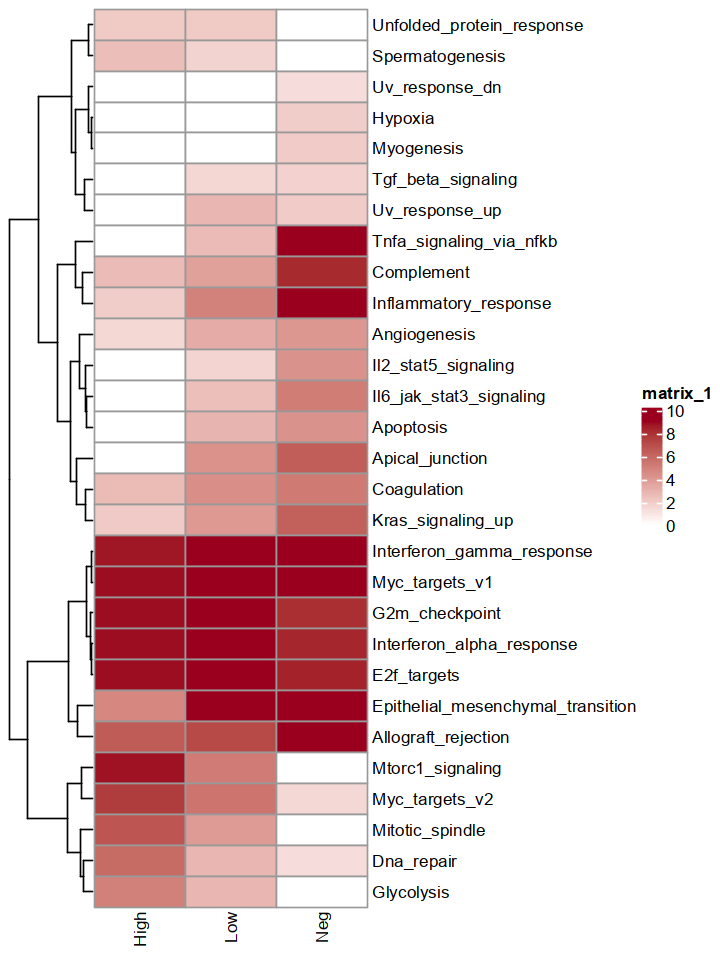

In [79]:
options(repr.plot.width =6,repr.plot.height=8)
#pdf(file = "06.GSEA_T_vs_N/GSEA_tumorhigher.heatmap.pdf",width = 6,height = 8)
#pheatmap(GSEAheatmap_tumor,cluster_cols = F,color = c("white","#9A001E"))
#dev.off()
pheatmap(GSEAheatmap_tumor,cluster_cols = F,color = c("white","#9A001E"))

In [80]:
od = hclust(dist(GSEAheatmap_tumor))$order
GSEAheatmap_tumor_order = GSEAheatmap_tumor[od, ]
GSEAheatmap_tumor_nes_order = GSEAheatmap_tumor_nes[od, ]

In [81]:
GSEAheatmap_tumor_order$name <- rownames(GSEAheatmap_tumor_order)
GSEAheatmap_tumor_order2 <- reshape2::melt(GSEAheatmap_tumor_order,id.vars =c("name"))

GSEAheatmap_tumor_nes_order$name <- rownames(GSEAheatmap_tumor_nes_order)
GSEAheatmap_tumor_nes_order2 <- reshape2::melt(GSEAheatmap_tumor_nes_order,id.vars =c("name"))

GSEAheatmap_tumor_order2[GSEAheatmap_tumor_order2$value == 0,3]=NA
GSEAheatmap_tumor_order2$name <- factor(GSEAheatmap_tumor_order2$name,levels=rev(GSEAheatmap_tumor_order$name))

In [82]:
GSEAheatmap_tumor_order2$nes <- GSEAheatmap_tumor_nes_order2$value
colnames(GSEAheatmap_tumor_order2) <- c("Name","group","padj","NES") 

In [83]:
p_gsea_geompoint <- ggplot(GSEAheatmap_tumor_order2) + geom_point(aes(x=group,y=Name,size=padj,color=NES))+
    theme_bw()+scale_size_area(max_size=7)+xlab('')+theme(axis.text = element_text(color="black"))+ylab("")+
    scale_colour_gradient2( low = 'white',mid = "#33CCCC",high = "red",midpoint = 1.4)
    #scale_colour_gradientn(colours = rev(heat.colors(10)))

Warning message:
“Removed 18 rows containing missing values (`geom_point()`).”


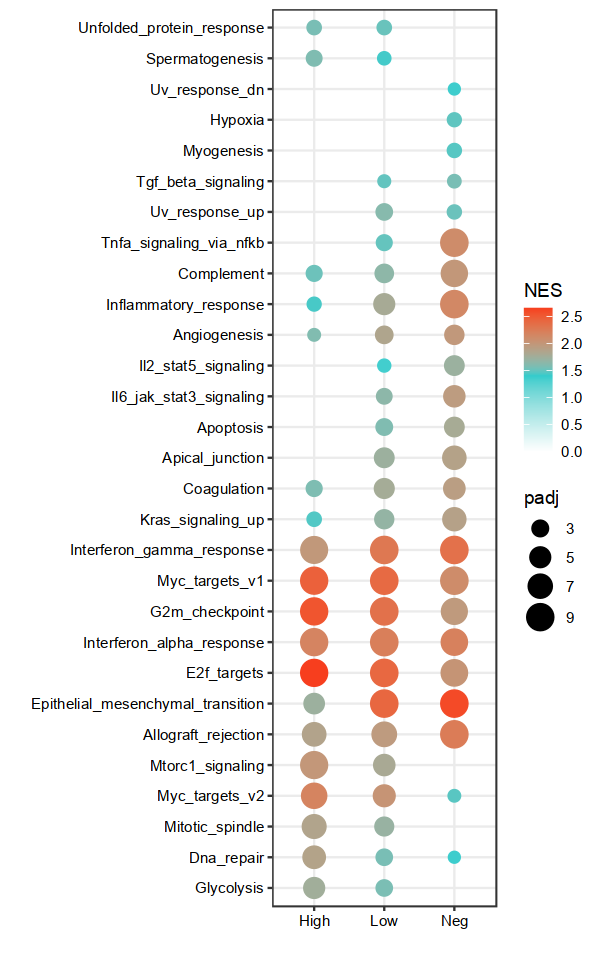

In [84]:
options(repr.plot.width =5,repr.plot.height=8)
p_gsea_geompoint

In [85]:
ggsave(plot =p_gsea_geompoint,filename = "GSEA_T_vs_N_bubble.pdf",width = 5,height = 7)

Warning message:
“Removed 18 rows containing missing values (`geom_point()`).”


In [363]:
gsea_high_tn$gsea@result %>% filter(p.adjust<0.05) %>% arrange(desc(NES)) -> high_gsea_tn
gsea_low_tn$gsea@result %>% filter(p.adjust<0.05) %>% arrange(desc(NES)) -> low_gsea_tn
gsea_neg_tn$gsea@result %>% filter(p.adjust<0.05) %>% arrange(desc(NES)) -> neg_gsea_tn

In [365]:
openxlsx::write.xlsx(list('High_vs_Normal' = high_gsea_tn,
                          'Low_vs_Normal' = low_gsea_tn,
                          'Neg_vs_Normal' = neg_gsea_tn),
           rowNames = TRUE, file = "GSEA.TumorvsNormal.xlsx")

### make the dotplot for all hallmarks, x-axis is tumor High vs Low or likewise, y-axis is tumor vs normal

In [173]:
dot_plot <- function(data1,data2){
    data1 %>% as_tibble() %>% arrange(desc(ID)) -> gsea_t_n_high
    data2 %>% as_tibble() %>% arrange(desc(ID)) -> gsea_t_high
    
    gsea_comb <- tibble(ID = str_to_lower(gsea_t_n_high$ID) %>% str_replace("hallmark_","") %>% str_to_title(),NES_TN =gsea_t_n_high$NES,NES_T =gsea_t_high$NES,
      P_TN = gsea_t_n_high$p.adjust,P_T = gsea_t_high$p.adjust) %>% mutate(P_tn2 = ifelse(P_TN<0.05,"Sig","No"))%>% 
    mutate(P_t2 = ifelse(P_T<0.05,"Sig","No")) 
    
    gsea_comb %>% mutate(label=ifelse(P_tn2=="Sig" & P_t2=="Sig",ID,""),
                     color=ifelse(P_tn2=="Sig" & P_t2=="Sig","Sig","No")) -> gsea_comb
    
   p <- ggplot(data=gsea_comb) + geom_point(aes(x=NES_T,y=NES_TN,color=color)) +theme_bw() + 
    scale_color_manual(values = c("black","red")) +
    geom_text_repel(data=gsea_comb,max.overlaps=Inf,aes(x=NES_T,y=NES_TN,label=label), point.padding = unit(0.8, "lines"))+
    theme(panel.grid = element_blank(),panel.border = element_blank(),axis.text = element_text(color="black")) +
    geom_vline(xintercept =0,linetype = "dashed") + geom_hline(yintercept =0,linetype= "dashed")+
    ylim(c(-max(abs(gsea_comb$NES_TN))-1,max(abs(gsea_comb$NES_TN))+1)) + xlim(c(-max(abs(gsea_comb$NES_T))-1,max(abs(gsea_comb$NES_T))+1))+
    xlab("NES of Tumor only") +ylab("NES of Tumor vs Normal")
    return(p)                                             
}

In [174]:
p_high2$gsea %>% as_tibble() %>% arrange(desc(ID)) -> gsea_t_n_high
p_high_t$gsea %>% as_tibble() %>% arrange(desc(ID)) -> gsea_t_high

gsea_comb <- tibble(ID = str_to_lower(gsea_t_n_high$ID) %>% str_replace("hallmark_","") %>% str_to_title(),NES_TN =gsea_t_n_high$NES,NES_T =gsea_t_high$NES,
  P_TN = gsea_t_n_high$p.adjust,P_T = gsea_t_high$p.adjust) %>% mutate(P_tn2 = ifelse(P_TN<0.05,"Sig","No"))%>% 
mutate(P_t2 = ifelse(P_T<0.05,"Sig","No")) 

gsea_comb %>% mutate(label=ifelse(P_tn2=="Sig" & P_t2=="Sig",ID,""),
                 color=ifelse(P_tn2=="Sig" & P_t2=="Sig","Sig","No")) -> gsea_comb


In [176]:
library(ggrepel)

In [177]:
vacano_plot_gsea <- function(data_TN,data_T){
    p_high2 = data_TN
    p_high_t = data_T
    p_high3 <- p_high2$gsea@result %>% arrange(ID)
    p_high3 %>% mutate(color=ifelse(p.adjust<0.05&NES>0,'TN_Sig','TN_Non-Sig')) -> p_high3
    p_high_t2 <- p_high_t$gsea@result %>% arrange(ID)
    p_high_t2 %>% mutate(color=ifelse(p.adjust<0.05&NES>0,'T_Sig','T_Non-Sig')) -> p_high_t2
    High_comb <- data.frame(TN_NES = p_high3$NES,TN_padj = p_high3$p.adjust,T_NES = p_high_t2$NES,
                            TN_color = p_high3$color,T_color = p_high_t2$color,
                            T_padj =p_high_t2$p.adjust,row.names =p_high_t2$ID )
    High_comb %>% mutate(label2=ifelse(TN_color=='TN_Sig',rownames(High_comb),'')) -> High_comb
    High_comb %>% mutate(label=ifelse(T_color=='T_Sig',rownames(High_comb),'')) -> High_comb
  
    p <- ggplot(data=High_comb)+geom_point(aes(x=TN_NES,y=-log10(TN_padj),color=TN_color)) + 
        geom_point(aes(x=T_NES+1,y=-log10(T_padj),color=T_color))+
        geom_text_repel(data=High_comb,aes(x=T_NES,y=-log10(T_padj),label = label),max.overlaps=Inf,point.padding = unit(0.8, "lines"))+
        scale_color_manual(values = c("gray","#FF4848",'#767676','#8A1BFF')) +theme_bw()+
        theme(panel.grid.major = element_blank(),panel.grid.minor = element_blank())
    return(p)
}


In [178]:
p_high <- vacano_plot_gsea(p_high2,p_high_t)
p_low <- vacano_plot_gsea(p_low2,p_low_t)
p_neg <- vacano_plot_gsea(p_neg2,p_neg_t)

In [ ]:
p_high

In [ ]:
p_low

In [ ]:
p_neg